# Emma and Michael's Dank Boio Modeling and Simulation in Python (Copyright Allen B. Downey) Project Number 3 in the Eleventh Month of the Two Thousand and Eighteenth Year

In [419]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
import math as math

In [420]:
x_0 = 0.3633e9 # 362,600,000 m at perigee
v_0 = 1022 # 1078.2 m/s at perigee
Me_0 = 5.9724e24 # 5.9722×10^24 kg
Mm_0 = 7.346e22 # 7.342×10^22 kg

init = State(Me = Me_0, # Initial mass of earth
             Mm = Mm_0, #Initial mass of moon
             x=x_0, # 362,600,000 m at perigee
             y=0,
             vx=0,
             vy=v_0 # 1078.2 m/s at perigee
            )


,values
Me,5.972400e+24
Mm,7.346000e+22
x,3.633000e+08
y,0.000000e+00
vx,0.000000e+00
vy,1.022000e+03


In [421]:
def earth_radius(mass):
    density = 5514 # 5514 kg/m3 from NASA Earth Fact Sheet
    Re = (3*mass / (4*pi*density))**(1/3)
    return Re
def moon_radius(mass):
    density = 3344 # 3344 kg/m3 from NASA Moon Fact Sheet
    Rm = (3*mass / (4*pi*density))**(1/3)
    return Rm

system = System(init=init,
                dmdt = 0, #kg/s,
                r_e = earth_radius,
                r_m = moon_radius,
                G=6.674e-11, #N / kg**2 * m**2
                t_0=0,
                t_end=2*365*24*60*60) 

,values
init,Me 5.972400e+24 Mm 7.346000e+22 x 3....
dmdt,0
r_e,<function earth_radius at 0x000001DD035E4AE8>
r_m,<function moon_radius at 0x000001DD02E23400>
G,6.674e-11
t_0,0
t_end,63072000


In [422]:
def net_force(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    Me,Mm,x,y,vx,vy = state
    unpack(system)
    
    #Gravitational Force
    r = Vector(x,y)
    force = (G * Me * Mm / r.mag**2)*r.hat()
    gravitational_force = -force 
    
    # Moon momentum contribution
    collision_force = dmdt * -Vector(vx,vy)
    
    return gravitational_force + collision_force

In [423]:
net_force(init, system)

<Quantity([-2.21847847e+20 -0.00000000e+00], 'dimensionless')>

In [424]:
def slope_func(state,t,system):
    
    Me,Mm,x,y,vx,vy = state
    unpack(system)
    V = Vector(vx,vy)
    
    Fnet = net_force(state,system)
    
    dMedt = -dmdt
    dMmdt = dmdt
    dxdt = V
    dvdt = Fnet / Mm
    
    return dMedt, dMmdt, dxdt[0], dxdt[1], dvdt[0],dvdt[1]

In [425]:
slope_func(init, 0, system)

(0,
 0,
 <Quantity(0.0, 'dimensionless')>,
 <Quantity(1022.0, 'dimensionless')>,
 <Quantity(-0.003019981575442834, 'dimensionless')>,
 <Quantity(-0.0, 'dimensionless')>)

In [426]:
def event_func(state,t,system):
    Me,Mm,x,y,vx,vy = state
    unpack(system)
   
    r = sqrt(x**2 + y**2)
    r_collision = earth_radius(Me) + moon_radius(Mm)
    
    return r - r_collision

In [427]:
event_func(init,0,system)

355191747.8121871

In [428]:
results, details = run_ode_solver(system, slope_func,events=event_func,  method="RK23")
details

,values
sol,None
t_events,[[]]
nfev,2822
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [429]:
results.index /= 365*24*60*60
results

,Me,Mm,x,y,vx,vy
0.000000e+00,5.972400e+24,7.346000e+22,3.633000e+08,0.000000e+00,0.000000e+00,1022.000000
6.205437e-14,5.972400e+24,7.346000e+22,3.633000e+08,2.000000e-03,-5.909943e-09,1022.000000
6.825981e-13,5.972400e+24,7.346000e+22,3.633000e+08,2.199999e-02,-6.500937e-08,1022.000000
6.888035e-12,5.972400e+24,7.346000e+22,3.633000e+08,2.219999e-01,-6.560037e-07,1022.000000
6.894241e-11,5.972400e+24,7.346000e+22,3.633000e+08,2.221999e+00,-6.565947e-06,1022.000000
6.894861e-10,5.972400e+24,7.346000e+22,3.633000e+08,2.222199e+01,-6.566538e-05,1022.000000
6.894923e-09,5.972400e+24,7.346000e+22,3.633000e+08,2.222219e+02,-6.566597e-04,1022.000000
6.894930e-08,5.972400e+24,7.346000e+22,3.633000e+08,2.222221e+03,-6.566603e-03,1022.000000
6.894930e-07,5.972400e+24,7.346000e+22,3.633000e+08,2.222222e+04,-6.566603e-02,1021.999998
6.894930e-06,5.972400e+24,7.346000e+22,3.632999e+08,2.222222e+05,-6.566603e-01,1021.999799


330679568.71534836

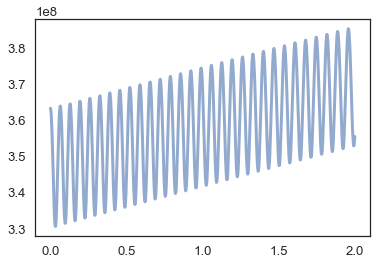

In [430]:
orbit_radius = (results.x**2 + results.y**2)**0.5
plot(orbit_radius)
orbit_radius.min()

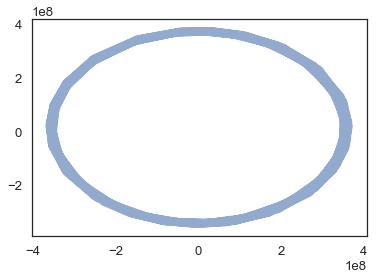

In [431]:
plot(results.y,results.x)